<a href="https://colab.research.google.com/github/wale-eth/Data-Analysis-Projects/blob/main/Twitter%20Sentiment%20Analysis/Analyzing_Twitter_User's_Sentiment_on_Nigeria_Presidential_Elections_Candidates_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Twitter User's Sentiment on Three Nigeria Presidential Elections Candidates 2023
This is a notebook by Nelson Adewale Tokosi.

In this project, I engaged NLP (Natural Language Processing) Techniques to scrape Twitter for what Nigerians are saying about the three (3) major Presidential candidates (in no order - **Peter Obi** of the Labour Party -LP-, Bola Ahmed **Tinubu** of the APC and **Atiku** Abubakar of the PDP) before the elections hold February, 2023. Earlier, in July 2022, this idea was suggested to me by a friend and mentor, we both agreed it'd be a meaningful campaign to draw out sentiment insights from Twitter pending the elections. In this Notebook, I make use of a number of key Python libraries to mine, retrieve, transform and represent data. Some of which includes *Tweepy* (a classic Tweet mining library), *NLTK* (Natural Language Toolkit), *MatPlotlib* and *WordCloud* for Data Exploration, *Textblob* for the Sentiment Analysis, as well as *EMOT* and *Plotly* for Emoji identification and Data Visualization respectively. 


**Google Colab** was the primary Notebook used for this project, and as such, there are specific imports and downloads put together for various executions as required.

# Contents
1. [Import Libraries](https://colab.research.google.com/drive/1qI6u5FT1fQqVcM1DcpsRjuO6M_bElpqJ#scrollTo=IM9_RaAEbJXB&line=6&uniqifier=1)

2. [Tweets Mining](https://colab.research.google.com/drive/1qI6u5FT1fQqVcM1DcpsRjuO6M_bElpqJ#scrollTo=Y8f27QHiwKjK&line=1&uniqifier=1)

3. [Data Cleaning](https://colab.research.google.com/drive/1qI6u5FT1fQqVcM1DcpsRjuO6M_bElpqJ#scrollTo=DqOwPuIowz7K&line=1&uniqifier=1)

4. [Tweets Processing]((https://colab.research.google.com/drive/1qI6u5FT1fQqVcM1DcpsRjuO6M_bElpqJ#scrollTo=_UUw0knixtyh&line=1&uniqifier=1))

5. [Data Exploration](https://colab.research.google.com/drive/1qI6u5FT1fQqVcM1DcpsRjuO6M_bElpqJ#scrollTo=uXqRYMr6mOW5&line=1&uniqifier=1)

6. [Sentiment Analysis](https://colab.research.google.com/drive/1qI6u5FT1fQqVcM1DcpsRjuO6M_bElpqJ#scrollTo=s99-YirUs5u8&line=2&uniqifier=1)

7. [Closing Remarks and Links](https://colab.research.google.com/drive/1qI6u5FT1fQqVcM1DcpsRjuO6M_bElpqJ#scrollTo=5LnGUlTvuFTP&line=1&uniqifier=1)




# Downloads

For Google Colab, you would need to download a few modules as they are not immediately accessible. That said, the entire procedure is seamless. 

In [1]:
# Dowloading NLTK modules for Google Colab
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
# Downloading and Installing EMOT for Emoticon identification for Google Colab
!pip install emot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 9.0 kB/s 


In [3]:
# Downloading and Installing EMOJI for Emoji identification for Google Colab
!pip install emoji==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=0d2992fe55dbae42e924b565a3ba5d4b140ea6b805314aefd3af27a1bf6b2817
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [4]:
# Downloading and Installing Kaleido for Visualization
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 119 kB/s 


# 1. Importing Libraries 
Here I show all the libraries I imported as well as the downloads I made for this project. For the sake of organization, I prefer to put these together first before going on with the project. 

In [5]:
import json
import csv
import tweepy
import re
import io
import pandas as pd
import requests
import string
from textblob import TextBlob
import plotly.express as px 

# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging

import numpy as np
from PIL import Image # for opening, manipulating, and saving many different image file f
from wordcloud import WordCloud
import matplotlib.pyplot as plt # for plotting
import random # generating random numbers

# Stack two subplots vertically, and add a scatter trace to each
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

#Emoji and Emoticon identification
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

# 2. Tweets Mining

I used the Tweepy library for Python to scrape tweets. You need a developer account with Twitter to get the keys used below for this task.

# Functions Defined for Mining
I only needed to create two functions for the Tweet Mining procedure. Since I was searching a single phrase per candidate, the initial function would serve to glean phrase-related tweets off twitter and save to a .csv file, while the second function would build on the existing data from the point of the last tweet ID. 

# Mining Timeframe
I ran the codes for three consecutive days per candidate obtained 5,000 tweets per day. Therefore, we collected around 15,000 tweets per candidate after the third day. 


In [ ]:
# Tweepy Authentication
consumerKey = "Enter Your Unique Key"
consumerSecret = "Enter Your Unique Key"
accessToken = "Enter Your Unique Token"
accessTokenSecret = "Enter Your Unique Token"

In [ ]:
# Define function to create dataset from search phrase

def create_dataset(consumerKey, consumerSecret, accessToken, accessTokenSecret, hashtag_phrase):
    
    # Twitter authentication and the connection to Twitter API
    auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
    auth.set_access_token(accessToken, accessTokenSecret)
    
    # Initializing Tweepy API
    api = tweepy.API(auth, wait_on_rate_limit=True)
    
    # Name of csv file to be created
    fname = "-Candidate_Name_Tweets"
    
    # Open the spreadsheet
    with open('%s.csv' % (fname), 'w', encoding="utf-8") as file:
        w = csv.writer(file)
        
        # Write header row (feature column names of your choice)
        w.writerow(['tweet_id', 'timestamp', 'tweet_text', 'username', 'all_hashtags', 'location', 
                    'followers_count', 'retweet_count', 'favorite_count'])
        
        # For each tweet matching hashtag, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, 
                                   q=hashtag_phrase+' -filter:retweets', 
                                   lang="en",
                                   tweet_mode='extended').items(5000):
            w.writerow([tweet.id, 
                        tweet.created_at, 
                        tweet.full_text.replace('\n',' ').encode('utf-8'), 
                        tweet.user.screen_name.encode('utf-8'), 
                        [e['text'] for e in tweet._json['entities']['hashtags']],  
                        tweet.user.location, 
                        tweet.user.followers_count, 
                        tweet.retweet_count, 
                        tweet.favorite_count])

# Enter your hashtag here
hashtag_phrase= "Candidate_Name"

if __name__ == '__main__':
    create_dataset(consumerKey, consumerSecret, accessToken, accessTokenSecret, hashtag_phrase)

For Peter Obi, the hashtag phrase was "Peter Obi" and file name was "Obi Tweets"
For Bola Ahmed Tinubu, the hashtag phrase was "Tinubu" and file name was "Tinubu Tweets"
For Atiku Abubakar, the hashtag phrase was "Atiku" and file name was "Atiku Tweets"

In [ ]:
"""Gathering tweets will take anywhere between 20 to 60 minutes. Read Collected csv dataset into a dataframe"""
dataset = '/content/data.csv'
df = pd.read_csv(dataset)


In [ ]:
# Second Function to Add to Dataset, using the last Tweet ID as the point of continuation.
def addto_dataset(consumerKey, consumerSecret, accessToken, accessTokenSecret, hashtag_phrase, since_id_val):
    
    # Twitter authentication and the connection to Twitter API
    auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
    auth.set_access_token(accessToken, accessTokenSecret)
    
    # Initializing Tweepy API
    api = tweepy.API(auth, wait_on_rate_limit=True)
    
    # Name of csv file to be opened
    fname = "Obi_Tweets"
    
    # Open the spreadsheet
    with open('%s.csv' % (fname), 'a', newline='', encoding="utf-8") as file:
        w = csv.writer(file)
        
        # Write header row (feature column names of your choice)
        w.writerow(['tweet_id', 'timestamp', 'tweet_text', 'username', 'all_hashtags', 'location', 
                    'followers_count', 'retweet_count', 'favorite_count'])
        
        # For each tweet matching hashtag, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, 
                                   q=hashtag_phrase+' -filter:retweets', 
                                   lang="en",
                                   since_id=since_id_val,
                                   tweet_mode='extended').items(5000):
            w.writerow([tweet.id, 
                        tweet.created_at, 
                        tweet.full_text.replace('\n',' ').encode('utf-8'), 
                        tweet.user.screen_name.encode('utf-8'), 
                        [e['text'] for e in tweet._json['entities']['hashtags']],  
                        tweet.user.location, 
                        tweet.user.followers_count, 
                        tweet.retweet_count, 
                        tweet.favorite_count])

# Enter your hashtag here
hashtag_phrase= "Peter Obi"

with open('Obi_Tweets.csv', encoding='utf-8') as data:
    latest_tweet = int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID

if __name__ == '__main__':
    addto_dataset(consumerKey, consumerSecret, accessToken, accessTokenSecret, hashtag_phrase, latest_tweet)

# 3. Data Cleaning
In this section, we will do basic cleaning on the data obtained from the previous section. We will


*   Drop Duplicates
*   Drop 'Username', 'All Hashtag', and 'Location' features

I dropped the Username feature for privacy reasons, the All Hashtag feature simply because it wasn't needed per se in this project and as for the Location feature, I dropped it because I could'nt access the premium feature of HERE Api that'll be required to convert the Place names to Lat, Lon data. This would make an interesting insight in future, as it'll show us where most of our tweets are coming from, whether within or outside Nigeria.



In [ ]:
def wrangle (filepath):

  # Read file
  df = pd.read_csv(filepath)

  # Drop Duplicates in Tweets using Tweet ID
  df = df.drop_duplicates(subset=['tweet_id']) 

  # Drop "'Username'", "'All Hashtag'" and "location" columns
  df = df.drop(['username', 'all_hashtags', 'location'], axis=1, inplace=False)

  return df

In [ ]:
# Wrangling the Peter Obi file
df_obi = wrangle('/content/Obi_Tweets.csv')
# Wrangling the Tinubu file
df_tin = wrangle('/content/Tinubu_Tweets.csv')
# Wrangling the Atiku file
df_atk = wrangle('/content/Atiku_Tweets.csv')

In [ ]:
print("The Obi file shape is:", df_obi.shape)
print("The Tinubu file shape is:", df_tin.shape)
print("The Atiku file shape is:", df_atk.shape)

The Obi file shape is: (15001, 6)
The Tinubu file shape is: (14997, 6)
The Atiku file shape is: (15001, 6)


# 4. Tweets Processing
To further process the tweet, I defined two functions;
1. clean_tweet & 
2. tweet_adj.

This was done to drop punctuations and other user-defined elements from the tweet, to carry out tokenization and lemmatization of the tweets. The latter was used to subset adjectives that will be needed for the Sentiment Analysis later. 

In [ ]:
# Obtain stopwords from combining NLTK stopwords, stand-alone alphabets and other user defined stop words
stop_words = list(stopwords.words('english'))
user_defined_sw = ['peter', 'obi', 'bola', 'tinubu', 'ahmed', 'atiku', 'kwankwaso', 'presidential', 
                   'omo', '2023', 'chai', 'wahala', 'cast', 'year', 'many', 'much', 'amp', 
                   'next', 'cant', 'wont', 'hadnt', 'havent', 'hasnt', 'isnt', 'shouldnt', 'couldnt', 'wasnt', 'werent',
                    'mustnt', '’', '...', '..', '.', '.....', '....', 'been…', 'one', 'two',
                    'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'aht',
                    've', 'political', 'sir', 'ur', 'collect']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_defined_sw + alphabets

# To ensure the words we analyse are English words alone, we get all words in the English language and emojis
word_list = words.words() 
emojis = list(UNICODE_EMOJI.keys())  # full list of emojis

In [ ]:
# Defining a function that removes stop words, links, punctuations and emojis

def clean_tweet(tweet):
  # Convert tweet to lowercase
  tweet = tweet.lower() 
  # Remove urls from tweet
  tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
  # Removing '@' and '#' from tweet
  tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
  # Removing stop words from tweet
    # First, convert tweets to tokens
  tweet_tokens = word_tokenize(tweet)
  mask = [w for w in tweet_tokens if w not in stop_words]
  mask = [w for w in mask if w not in emojis]
  mask = [w for w in mask if w in word_list]
  # Remove punctuations
  unpunctuated_words = [char for char in mask if char not in string.punctuation]
  unpunctuated_words = ' '.join(unpunctuated_words)

  return "".join(unpunctuated_words)

# Defining a function to collect Adjectives from each tweet
def tweet_adj(tweet):
    tweet = word_tokenize(tweet)
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  
    return " ".join(tweet)  


In [ ]:
# Apply 'Clean Tweet' function to the 'tweet_text' feature of each candidate

# For the Peter Obi Dataset
df_obi['Cleaned_Tweet'] = df_obi['tweet_text'].apply(clean_tweet)

# For the Tinubu Dataset
df_tin['Cleaned_Tweet'] = df_tin['tweet_text'].apply(clean_tweet)

# For the Atiku Dataset
df_atk['Cleaned_Tweet'] = df_atk['tweet_text'].apply(clean_tweet)

This process took 38 minutes. 

I will be saving the results to a csv file

In [ ]:
# Checking Dataframe to see applied changes.
df_atk.head()

,tweet_id,timestamp,tweet_text,followers_count,retweet_count,favorite_count,Cleaned_Tweet
0,1584447423866621953,2022-10-24 07:31:18,b'JUST IN: \xe2\x80\x9cI won\xe2\x80\x99t gove...,2205,0,0,govern via
1,1584447383709962241,2022-10-24 07:31:08,b'@realEricAnde_20 @atiku Sense is not for eve...,2,0,0,sense every rule north south betrayer divider ...
2,1584447359744086017,2022-10-24 07:31:02,"b""It's a bright &amp; beautiful Monday morning...",183,0,0,bright beautiful morning elephant sick work pl...
3,1584447272334823425,2022-10-24 07:30:41,"b""@uty_onuk @Angela201045315 @Osinbajo @atiku ...",598,0,0,age already running second degree done works w...
4,1584447260091637765,2022-10-24 07:30:39,b'Glad to see that the #PDPRecoveryPlan messag...,538,0,0,see message already live city lost glory oil c...


In [ ]:
# Saving new dataframe as csv files
df_obi.to_csv('Cleaned_Obi.csv')
df_tin.to_csv('Cleaned_Tinubu.csv')
df_atk.to_csv('Cleaned_Atiku.csv')

In [ ]:
# Get Adjectives from the new 'Cleaned Tweet' feature and assign to 'Tweet_Adj' for each Candidate

# For the Peter Obi Dataset
df_obi['Tweets_Adj'] = df_obi['Cleaned_Tweet'].apply(tweet_adj)

# For the Tinubu Dataset
df_tin['Tweets_Adj'] = df_tin['Cleaned_Tweet'].apply(tweet_adj)

# For the Atiku Dataset
df_atk['Tweets_Adj'] = df_atk['Cleaned_Tweet'].apply(tweet_adj)

In [ ]:
# Checking Dataframe to see applied changes.

df_atk.head()

,tweet_id,timestamp,tweet_text,followers_count,retweet_count,favorite_count,Cleaned_Tweet,Tweets_Adj
0,1584447423866621953,2022-10-24 07:31:18,b'JUST IN: \xe2\x80\x9cI won\xe2\x80\x99t gove...,2205,0,0,govern via,govern
1,1584447383709962241,2022-10-24 07:31:08,b'@realEricAnde_20 @atiku Sense is not for eve...,2,0,0,sense every rule north south betrayer divider ...,south north reject
2,1584447359744086017,2022-10-24 07:31:02,"b""It's a bright &amp; beautiful Monday morning...",183,0,0,bright beautiful morning elephant sick work pl...,bright beautiful sick want unifier
3,1584447272334823425,2022-10-24 07:30:41,"b""@uty_onuk @Angela201045315 @Osinbajo @atiku ...",598,0,0,age already running second degree done works w...,second
4,1584447260091637765,2022-10-24 07:30:39,b'Glad to see that the #PDPRecoveryPlan messag...,538,0,0,see message already live city lost glory oil c...,live glory


In [ ]:
# Performing Lemmatization on the tweets in order to return them to their base form for analysis.

def lemma_TweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)


In [ ]:
# Applying the Lemmatization function on the 'Clean Tweet' feature to get Sentiment key words for each Candidate. 

# For the Peter Obi Dataset
df_obi['Tweets_Sentiments'] = df_obi['Cleaned_Tweet'].apply(lemma_TweetsSentiments)

# For the Tinubu Dataset
df_tin['Tweets_Sentiments'] = df_tin['Cleaned_Tweet'].apply(lemma_TweetsSentiments)

# For the Atiku Dataset
df_atk['Tweets_Sentiments'] = df_atk['Cleaned_Tweet'].apply(lemma_TweetsSentiments)

In [ ]:
# Checking Dataframe to see applied changes.
df_tin.head()

,tweet_id,timestamp,tweet_text,followers_count,retweet_count,favorite_count,Cleaned_Tweet,Tweets_Adj,Tweets_Sentiments,Subjectivity,Polarity,Sentiment
0,1584308259388682240,2022-10-23 22:18:18,"b""@Forever_Rayyan @atiku @IAOkowa @EEskaylvl @...",1126,0,0,see becoming president neither see coming pres...,,see becoming president neither see coming pres...,0.850000,0.450000,Positive
1,1584308253802246144,2022-10-23 22:18:17,"b""@olawuyiowolabi @Kamaldeenlawal @Miraclework...",497,0,0,control fighting top another man confidence re...,top,control fighting top another man confidence re...,0.500000,0.500000,Positive
2,1584308234562965504,2022-10-23 22:18:12,b'@alabiopeyemiola Tinubu will not win the pre...,10542,0,0,win election,win,win election,0.400000,0.800000,Positive
3,1584308223728701441,2022-10-23 22:18:10,"b""@renoomokri @renoomokri it's amazing how you...",188,0,0,amazing keep cheap propaganda tackled equate b...,cheap equate sure aware heavy,amazing keep cheap propaganda tackled equate b...,0.556481,0.241667,Positive
4,1584308223301255169,2022-10-23 22:18:10,b'@Divinefundz1 @b_priscwill @g_makuachukwu3 @...,43,0,0,let vote,,let vote,0.000000,0.000000,Neutral


In [ ]:
# Saving final dataframe as csv files
df_obi.to_csv('Cleaned_Obi.csv')
df_tin.to_csv('Cleaned_Tinubu.csv')
df_atk.to_csv('Cleaned_Atiku.csv')

# 5. Data Exploration
For most analysis campaigns, Data Exploration is the most immediately rewarding. I was able to draw out the ten most commonly used words from the 'Tweet Adj' feature. Wordcloud was used to represent a visual figure of the popular words in the feature, this was done for each Presidential aspirant.


Data Exploration for the **Peter Obi** Dataset

In [ ]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = df_obi['Tweets_Adj'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [ ]:
# Import Candidate Logo
image = np.array(Image.open('/content/pobiii.png'))

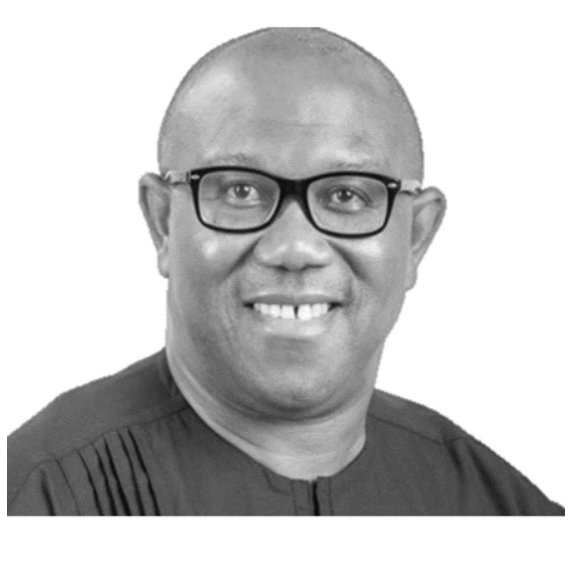

In [ ]:
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(10) # set width
fig.set_figheight(14) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [ ]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

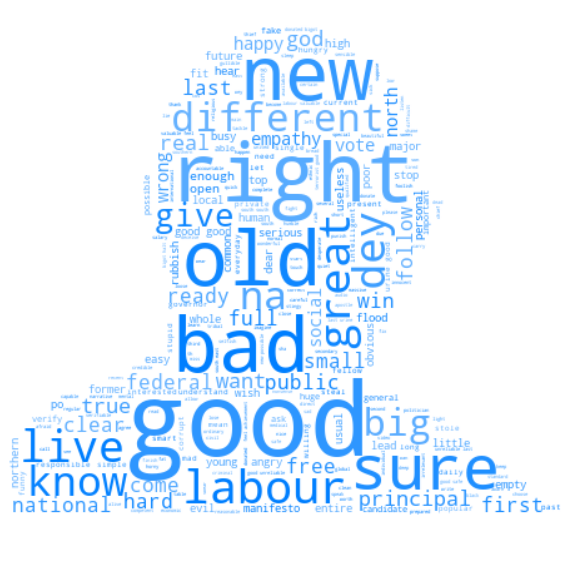

In [ ]:
# Instantiate the peter obi word cloud object
peter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
peter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10)  # set width
fig.set_figheight(14)  # set height

plt.imshow(peter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Exporting the worldcloud image as png
peter_wc.to_file("Obi_wordcloud.png")

# Analysing top words in the Word Cloud

In [ ]:
# Combine all words into a list
tweets_long_string = df_obi['Tweets_Adj'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [ ]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
dfc = pd.DataFrame.from_dict(counts, orient='index').reset_index()
dfc.columns = ['Words', 'Count']
dfc.sort_values(by='Count', ascending=False, inplace=True)

In [ ]:
dfc.head(10)

,Words,Count
97,good,623
149,new,218
99,right,203
94,labour,201
215,old,193
140,bad,183
179,last,169
36,sure,155
219,great,146
191,live,137


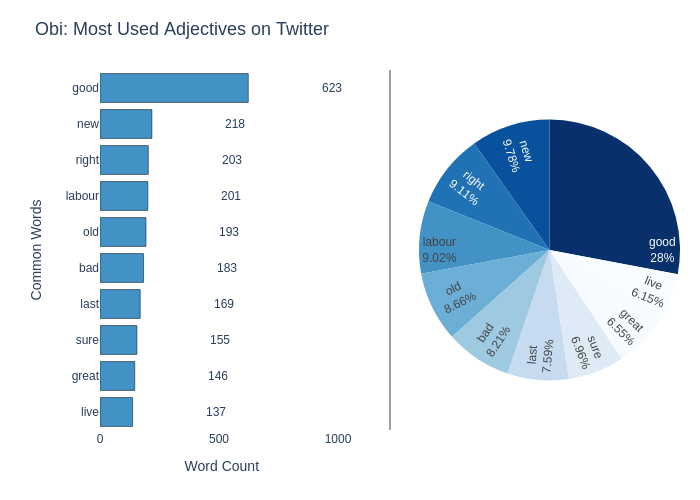

In [ ]:
# print(px.colors.sequential.Blues_r) to get the colour list used here. Please note, I swatched some colours

# Define my colours for the Plotly Plot
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = dfc['Count'].head(10), y=dfc['Words'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=dfc['Words'].head(10),values=dfc['Count'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="Obi: Most Used Adjectives on Twitter",
                  font=dict(size=18, )))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
x = dfc['Count'].head(10).to_list()
y = dfc['Words'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show(renderer = 'png')

Data Exploration for the **Bola Tinubu** Dataset

In [ ]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = df_tin['Tweets_Adj'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [ ]:
# Import Candidate Logo
image = np.array(Image.open('/content/tinubuuu.png'))

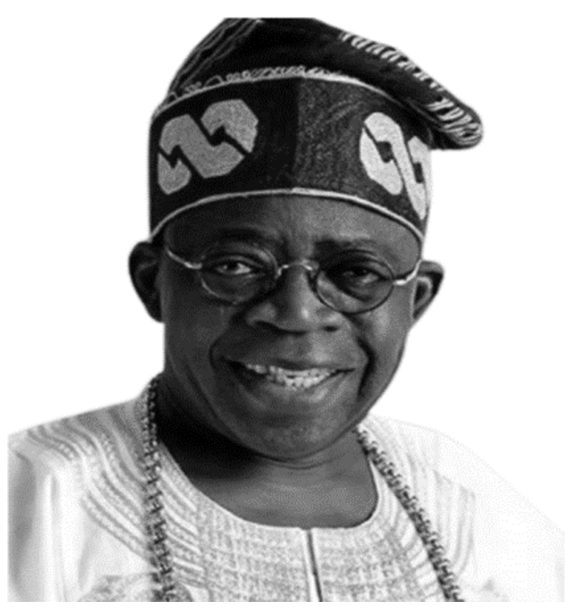

In [ ]:
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(10) # set width
fig.set_figheight(14) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

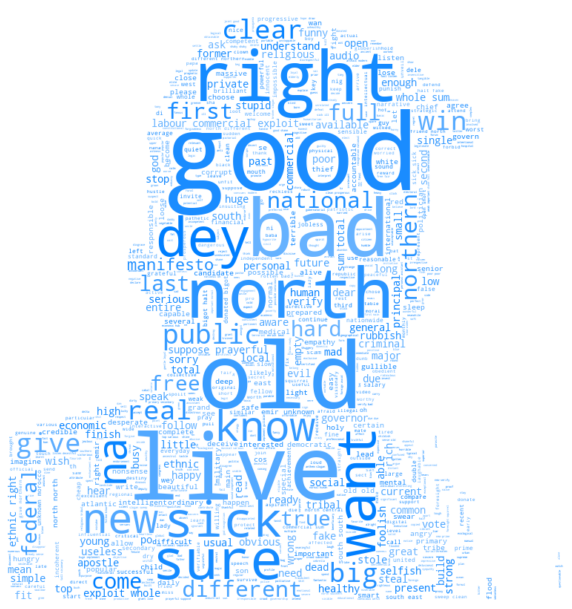

In [ ]:
# Instantiate the tinubu obi word cloud object
tinubu_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
tinubu_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10)  # set width
fig.set_figheight(14)  # set height

plt.imshow(tinubu_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Exporting the worldcloud image as png
tinubu_wc.to_file("tinubu_wordcloud.png")

# Analysing top words in the Word Cloud

In [ ]:
# Combine all words into a list
tweets_long_string = df_tin['Tweets_Adj'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [ ]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
dfc = pd.DataFrame.from_dict(counts, orient='index').reset_index()
dfc.columns = ['Words', 'Count']
dfc.sort_values(by='Count', ascending=False, inplace=True)

In [ ]:
dfc.head(10)

,Words,Count
20,good,461
2,north,294
10,live,251
64,old,214
35,bad,177
1,south,162
16,right,152
114,national,151
134,last,146
82,different,141


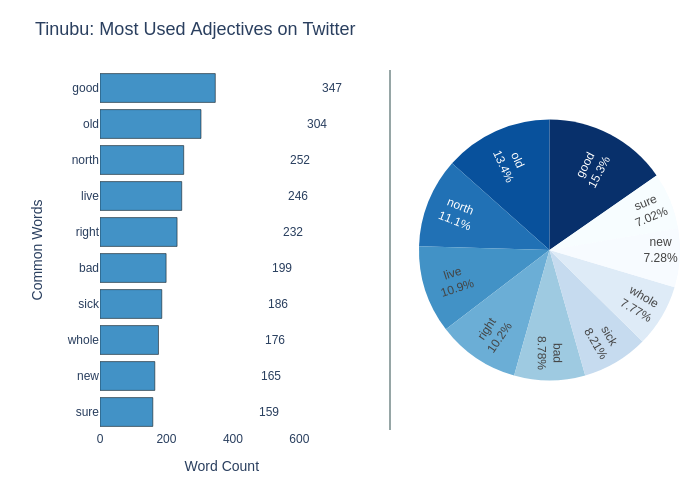

In [ ]:
# print(px.colors.sequential.Blues_r) to get the colour list used here. Please note, I swatched some colours

# Define my colours for the Plotly Plot
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = dfc['Count'].head(10), y=dfc['Words'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=dfc['Words'].head(10),values=dfc['Count'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="Tinubu: Most Used Adjectives on Twitter",
                  font=dict(size=18, )))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
x = dfc['Count'].head(10).to_list()
y = dfc['Words'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show(renderer = 'png')

Data Exploration for the **Atiku Abubakar** Dataset

In [ ]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = df_atk['Tweets_Adj'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [ ]:
# Import Candidate Logo
image = np.array(Image.open('/content/atikuuu.png'))

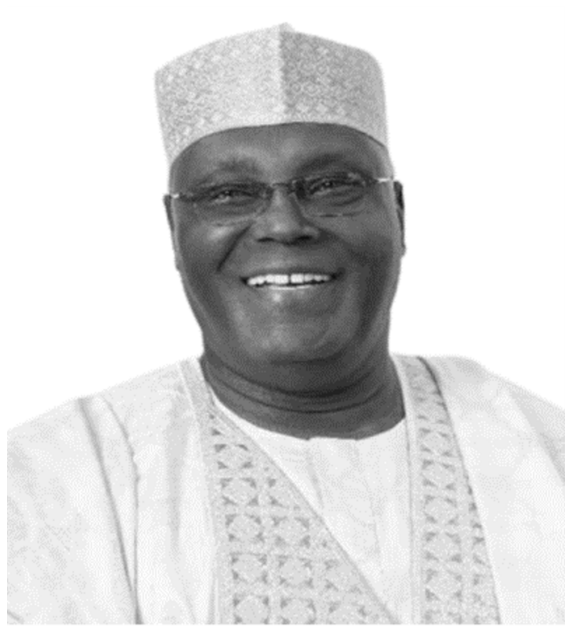

In [ ]:
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(10) # set width
fig.set_figheight(14) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

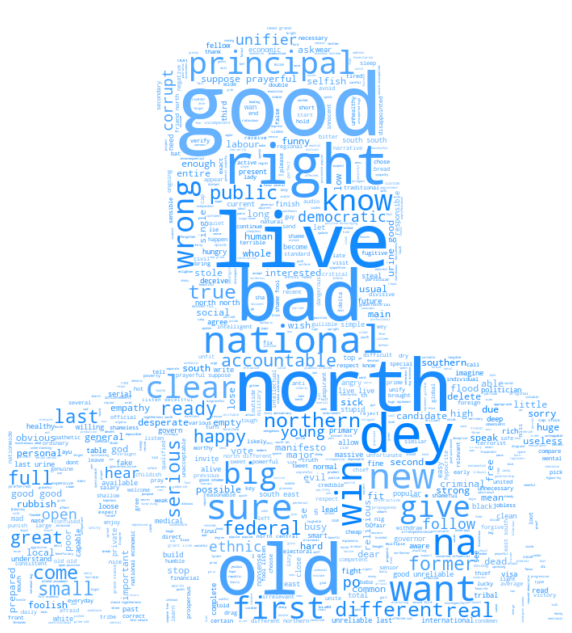

In [ ]:
# Instantiate the atiku word cloud object
atiku_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
atiku_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10)  # set width
fig.set_figheight(14)  # set height

plt.imshow(atiku_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Exporting the worldcloud image as png
atiku_wc.to_file("atiku_wordcloud.png")

# Analysing top words in the Word Cloud

In [ ]:
# Combine all words into a list
tweets_long_string = df_atk['Tweets_Adj'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [ ]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
dfc = pd.DataFrame.from_dict(counts, orient='index').reset_index()
dfc.columns = ['Words', 'Count']
dfc.sort_values(by='Count', ascending=False, inplace=True)

In [ ]:
dfc.head(10)

,Words,Count
20,good,461
2,north,294
10,live,251
64,old,214
35,bad,177
1,south,162
16,right,152
114,national,151
134,last,146
82,different,141


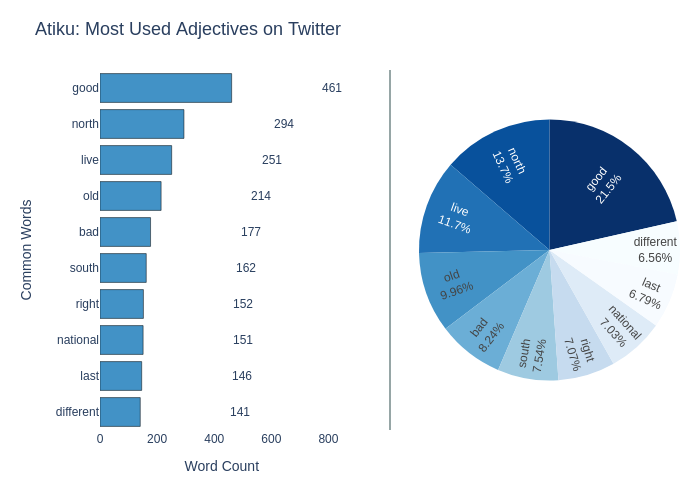

In [ ]:
# print(px.colors.sequential.Blues_r) to get the colour list used here. Please note, I swatched some colours

# Define my colours for the Plotly Plot
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = dfc['Count'].head(10), y=dfc['Words'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=dfc['Words'].head(10),values=dfc['Count'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="Atiku: Most Used Adjectives on Twitter",
                  font=dict(size=18, )))

# Customize background, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
x = dfc['Count'].head(10).to_list()
y = dfc['Words'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show(renderer = 'png')

#7. Sentiment Analysis

To calculate Sentiment, we need to obtain values for Polarity and Subjectivity for which I created functions. MatPlotlib and WordCloud was also used in this section.

In [7]:
# Create function to obtain Subjectivity Score
def Subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Create function to obtain Polarity Score
def Polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentiment(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [8]:
# Apply all functions above to respective columns

# For the Peter Obi Dataset
df_obi['Subjectivity']=(df_obi['Tweets_Sentiments'].apply(str)).apply(Subjectivity)
df_obi['Polarity']=(df_obi['Tweets_Sentiments'].apply(str)).apply(Polarity)
df_obi['Sentiment']=df_obi['Polarity'].apply(getSentiment)

# For the Tinubu Dataset
df_tin['Subjectivity']=(df_tin['Tweets_Sentiments'].apply(str)).apply(Subjectivity)
df_tin['Polarity']=(df_tin['Tweets_Sentiments'].apply(str)).apply(Polarity)
df_tin['Sentiment']=df_tin['Polarity'].apply(getSentiment)

# For the Atiku Dataset
df_atk['Subjectivity']=(df_atk['Tweets_Sentiments'].apply(str)).apply(Subjectivity)
df_atk['Polarity']=(df_atk['Tweets_Sentiments'].apply(str)).apply(Polarity)
df_atk['Sentiment']=df_atk['Polarity'].apply(getSentiment)

In [9]:
# See quick results of the Sentiment Analysis for the Obi Dataset
df_obi['Sentiment'].value_counts()

Neutral     6725
Positive    5799
Negative    2477
Name: Sentiment, dtype: int64

In [10]:
# See quick results of the Sentiment Analysis for the Tinubu Dataset
df_tin['Sentiment'].value_counts()

Neutral     6541
Positive    5557
Negative    2899
Name: Sentiment, dtype: int64

In [11]:
# See quick results of the Sentiment Analysis for the Atiku Dataset
df_atk['Sentiment'].value_counts()

Neutral     7110
Positive    5206
Negative    2685
Name: Sentiment, dtype: int64

# Comparative Analysis

At this juncture, my goal is to perform a comparative analysis of the Positive, Negative and Neutral sentiments. This will avail us with an idea of the proportion of Twitter users contributing on social media per sentiment for each candidate.

Our ultimate goal is to create a combined dataframe of Sentiments, Counts and Normalized Counts for each candidate. Then we will display plot that shows the compared Sentiment values between each candidate


In [12]:
# Convert result to dataframe and then append the normalized calculation in list form to the dataframe

# For the Peter Obi Sentiment Result

total_o = (df_obi['Sentiment'].value_counts())[0] + (df_obi['Sentiment'].value_counts())[1] + (df_obi['Sentiment'].value_counts())[2]
df_ob = df_obi['Sentiment'].value_counts().to_frame()
df_ob['Normalized_Count'] = [(((df_obi['Sentiment'].value_counts())[0]/total_o)*100).round(2), 
                              (((df_obi['Sentiment'].value_counts())[1]/total_o)*100).round(2), 
                              (((df_obi['Sentiment'].value_counts())[2]/total_o)*100).round(2)]

# Include a Candidate Column to dataframe
df_ob['Candidate'] = ['Obi', 'Obi', 'Obi']

# Reset Datafrane Index 
df_ob.reset_index(inplace = True, drop = False)

# Renaming Columns accordingly
df_ob.rename(columns={'index':'Sentiment', 'Sentiment': 'Count'}, inplace=True)

# Making Candidate the Index
df_ob.set_index('Candidate', inplace=True)

# For the Bola Tinubu Sentiment Result

total_t = (df_tin['Sentiment'].value_counts())[0] + (df_tin['Sentiment'].value_counts())[1] + (df_tin['Sentiment'].value_counts())[2]

df_ti = df_tin['Sentiment'].value_counts().to_frame()
df_ti['Normalized_Count'] = [(((df_tin['Sentiment'].value_counts())[0]/total_t)*100).round(2), 
                              (((df_tin['Sentiment'].value_counts())[1]/total_t)*100).round(2), 
                              (((df_tin['Sentiment'].value_counts())[2]/total_t)*100).round(2)]

# Include a Candidate Column to dataframe
df_ti['Candidate'] = ['Tinubu', 'Tinubu', 'Tinubu']

# Reset Datafrane Index 
df_ti.reset_index(inplace = True, drop = False)

# Renaming Columns accordingly
df_ti.rename(columns={'index':'Sentiment', 'Sentiment': 'Count'}, inplace=True)

# Making Candidate the Index
df_ti.set_index('Candidate', inplace=True)

# For the Atiku Abubakar Sentiment Result

total_a = (df_atk['Sentiment'].value_counts())[0] + (df_atk['Sentiment'].value_counts())[1] + (df_atk['Sentiment'].value_counts())[2]

df_at = df_atk['Sentiment'].value_counts().to_frame()
df_at['Normalized_Count'] = [(((df_atk['Sentiment'].value_counts())[0]/total_a)*100).round(2), 
                              (((df_atk['Sentiment'].value_counts())[1]/total_a)*100).round(2), 
                              (((df_atk['Sentiment'].value_counts())[2]/total_a)*100).round(2)]

# Include a Candidate Column to dataframe
df_at['Candidate'] = ['Atiku', 'Atiku', 'Atiku']

# Reset Datafrane Index 
df_at.reset_index(inplace = True, drop = False)

# Renaming Columns accordingly
df_at.rename(columns={'index':'Sentiment', 'Sentiment': 'Count'}, inplace=True)

# Making Candidate the Index
df_at.set_index('Candidate', inplace=True)

# Combine all three dataframes together 

df_main = pd.concat([df_ob, df_ti, df_at])

In [13]:
# A quick peek at our combined dataframe
df_main

,Sentiment,Count,Normalized_Count
Candidate,,,
Obi,Neutral,6725,44.83
Obi,Positive,5799,38.66
Obi,Negative,2477,16.51
Tinubu,Neutral,6541,43.62
Tinubu,Positive,5557,37.05
Tinubu,Negative,2899,19.33
Atiku,Neutral,7110,47.40
Atiku,Positive,5206,34.70
Atiku,Negative,2685,17.90


In [14]:
# Converting the df_main dataframe to a multi index dataframe

multi = df_main.reset_index()

multi = multi.set_index(['Candidate', 'Sentiment'])

multi

Count  Normalized_Count
Candidate Sentiment                         
Obi       Neutral     6725             44.83
          Positive    5799             38.66
          Negative    2477             16.51
Tinubu    Neutral     6541             43.62
          Positive    5557             37.05
          Negative    2899             19.33
Atiku     Neutral     7110             47.40
          Positive    5206             34.70
          Negative    2685             17.90

# Plotting Combined Bar Chart of Candidate Sentiment

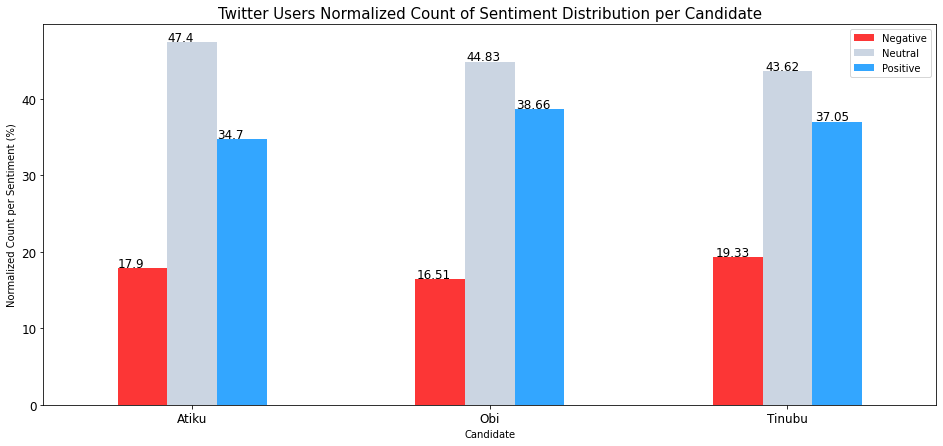

In [15]:
colors = ['#FC0303', '#bfcbdb', '#0090ff']
ax = multi.unstack().plot(
    y = 'Normalized_Count', 
    kind='bar', 
    stacked=False, 
    fontsize = 12,
    figsize=(16,7),
    color = colors,
    alpha = 0.8
    );

# Annotate plot with values from 'Normalized_Count' column
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 12)

plt.ylabel('Normalized Count per Sentiment (%)') # Y axis label
plt.title('Twitter Users Normalized Count of Sentiment Distribution per Candidate', fontsize = 15) # Chart Title
plt.xticks(rotation = 0) # Angle of labels on X axis
plt.legend(fontsize = 10) # Chart legend/key 
plt.show()


# Comparing Positive and Negative Sentiment per Candidate

In [16]:
# Plotting Positive Sentiments side by side

df_main_pos = df_main[df_main['Sentiment'] == 'Positive'] # Subset df_main for 'Positive' sentiment

df_main_pos.reset_index()

,Candidate,Sentiment,Count,Normalized_Count
0,Obi,Positive,5799,38.66
1,Tinubu,Positive,5557,37.05
2,Atiku,Positive,5206,34.70


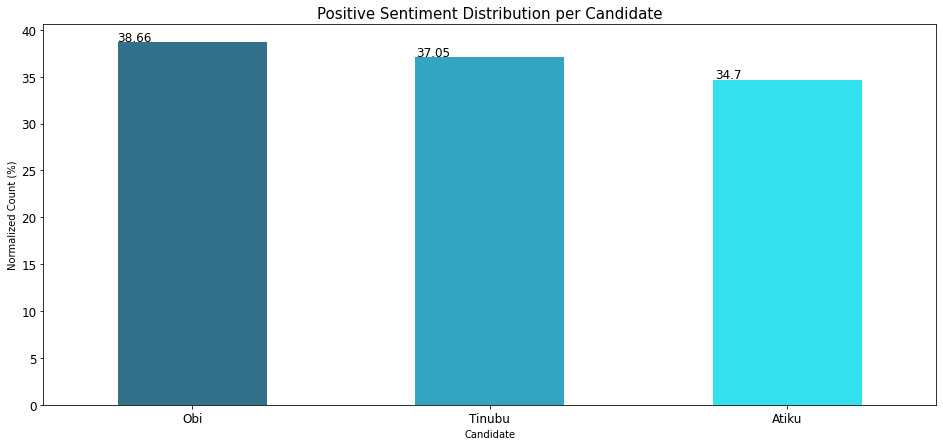

In [17]:

colors = ['#004c6d', '#008fb1', '#00d9e9']
ax = df_main_pos.reset_index().plot(
    x = 'Candidate',
    y = 'Normalized_Count', 
    kind='bar', 
    stacked=False, 
    fontsize = 12,
    figsize=(16,7),
    color = colors,
    alpha = 0.8,
    legend = ()
    );

# Annotate plot with values from 'Normalized_Count' column
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 12)

plt.ylabel('Normalized Count (%)') # Y axis label
plt.title('Positive Sentiment Distribution per Candidate', fontsize = 15) # Chart Title
plt.xticks(rotation = 0) # Angle of labels on X axis
plt.show()


In [39]:
# Plotting Negative Sentiments side by side

df_main_neg = df_main[df_main['Sentiment'] == 'Negative'] # Subset df_main for 'Negative' sentiment
df_main_neg = df_main_neg.sort_values('Normalized_Count', ascending=False)
df_main_neg.reset_index()

,Candidate,Sentiment,Count,Normalized_Count
0,Tinubu,Negative,2899,19.33
1,Atiku,Negative,2685,17.90
2,Obi,Negative,2477,16.51


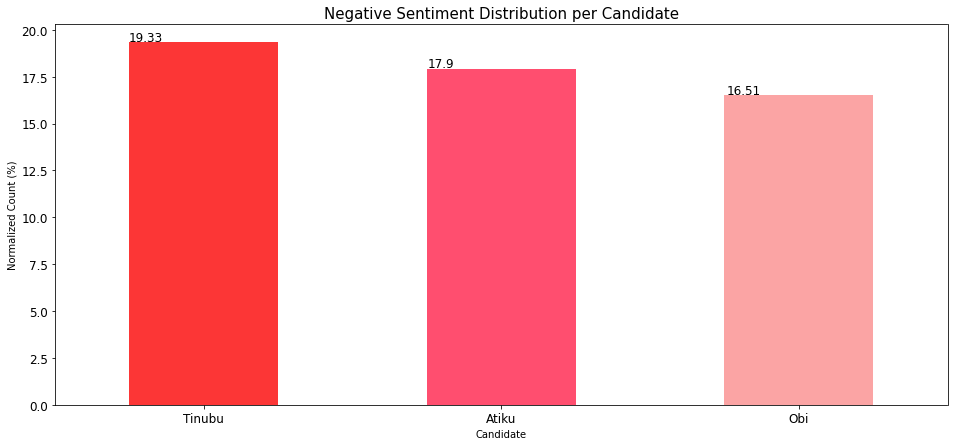

In [41]:

colors = ['#FC0303', '#FF224B', '#fa8e8e']
ax = df_main_neg.reset_index().plot(
    x = 'Candidate',
    y = 'Normalized_Count', 
    kind='bar', 
    stacked=False, 
    fontsize = 12,
    figsize=(16,7),
    color = colors,
    alpha = 0.8,
    legend = ()
    );

# Annotate plot with values from 'Normalized_Count' column
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 12)

plt.ylabel('Normalized Count (%)') # Y axis label
plt.title('Negative Sentiment Distribution per Candidate', fontsize = 15) # Chart Title
plt.xticks(rotation = 0) # Angle of labels on X axis
plt.show()


## Thank You!

For going through my analysis and making it all the way to the end. 

Hope you got some insights!

I have written a lot more about my thoughts on observed limitations as pertaining to this project, a few recommendations and things I would change or introduce going forward and a personal commentary on the results obtained; my thoughts on its relevance and the overall congruence of the results gathered to the present political reality on Twitter. 

For these and the top-down run through of the project, here's a read on medium:

[medium.com](https://medium.com/@nelsontokosi)

Also feel free to connect with  me on 
[LinkedIn](https://www.linkedin.com/in/adetokosi/)

Cheers.